In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import label_binarize
import warnings
warnings.filterwarnings("ignore")

In [6]:
%%capture
%run "C:\Users\Lenovo\Desktop\Heart_Disease_Project_SPRINTSXMICROSOFT\notebooks\03_feature_selection.ipynb"

In [7]:
# 1. Split the dataset into training (80%) and testing (20%) sets.
X_train,X_test,y_train,y_test=train_test_split(X_reduced,y_cleaned,test_size=0.2,random_state=42)

In [8]:
# Create a function to calculate training and testing accuracy 
def accuracy_calc(model):
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)
    
    print(f"accuracy of training data = {accuracy_score(y_train, y_train_predict)*100:.2f}%")
    print(f"accuracy of testing data = {accuracy_score(y_test, y_test_predict)*100:.2f}%")

In [9]:
# 1 - Logistic Regression model
lrmodel=LogisticRegression()
lrmodel.fit(X_train,y_train)
print(accuracy_calc(lrmodel))

accuracy of training data = 63.71%
accuracy of testing data = 58.33%
None


In [10]:
# 2 - Decision Tree model
dtmodel=DecisionTreeClassifier()
dtmodel.fit(X_train,y_train)
print(accuracy_calc(dtmodel))

accuracy of training data = 100.00%
accuracy of testing data = 50.00%
None


In [11]:
# 3 - Random Forest model
rfmodel = RandomForestClassifier()
rfmodel.fit(X_train,y_train)

accuracy_calc(rfmodel)

accuracy of training data = 100.00%
accuracy of testing data = 56.67%


In [12]:
# 4 - Support Vector Machine (SVM) model
svmmodel = SVC(probability=True)
svmmodel.fit(X_train,y_train)

accuracy_calc(svmmodel)

accuracy of training data = 52.32%
accuracy of testing data = 60.00%


In [13]:
# function to calculate Accuracy, Precision, Recall, F1-score for a model
def evaluate (model,txt):
    y_TEST=y_test
    y_pred=model.predict(X_test)
    print(f'{txt} Model: ')
    print('Accuracy: ',accuracy_score(y_TEST,y_pred,))
    print('Precision: ',precision_score(y_TEST,y_pred,average='macro'))
    print('Recall: ',recall_score(y_TEST,y_pred,average='macro'))
    print('F1 : ',f1_score(y_TEST,y_pred,average='macro'))
# function to compute AUC and plot ROC curve
def ROC_AUC(model,txt):
    y_TEST = y_test
    y_pred = model.predict_proba(X_test)
     # Binarize true labels (1=TRUE)
    y_TEST_b = label_binarize(y_TEST, classes=[0, 1, 2,3,4])
    # Compute ROC curve for each class
    for i in range(5): # 5 is the number of classes
        fpr, tpr, thresholds = roc_curve(y_TEST_b[:,i], y_pred[:,i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')
    
    plt.plot([0,1],[0,1],'k--')#diaganol line for classifier
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for Each Class - {txt} Model')
    plt.legend()
    plt.show()

Logistic Regression Model: 
Accuracy:  0.5833333333333334
Precision:  0.2193089430894309
Recall:  0.24555555555555553
F1 :  0.22886446886446885


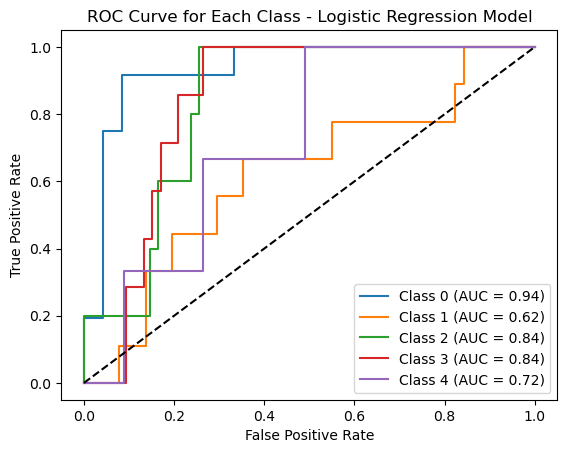

In [14]:
# 1 - Logistic Regression model
evaluate (lrmodel,"Logistic Regression")
ROC_AUC(lrmodel,"Logistic Regression")

Decision Tree Model: 
Accuracy:  0.5
Precision:  0.1919191919191919
Recall:  0.2
F1 :  0.19555555555555557


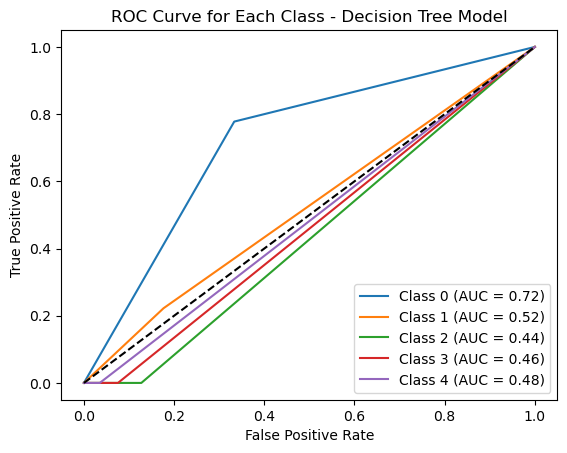

In [15]:
# 2 - Decision Tree model
evaluate (dtmodel,"Decision Tree")
ROC_AUC(dtmodel,"Decision Tree")

Random Forest Model: 
Accuracy:  0.5666666666666667
Precision:  0.21000000000000002
Recall:  0.24
F1 :  0.22271969516551557


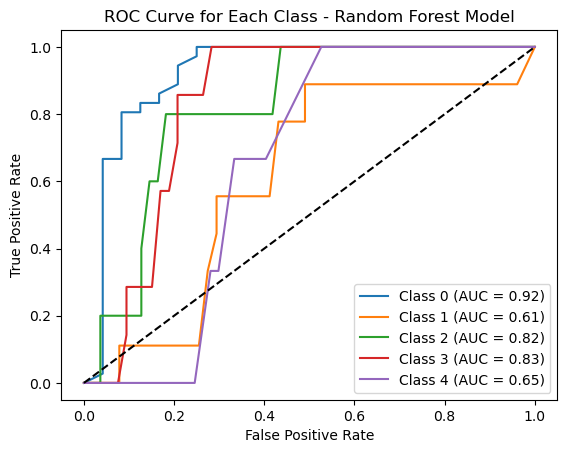

In [16]:
# 3 - Random Forest model
evaluate(rfmodel,"Random Forest")
ROC_AUC(rfmodel,"Random Forest")

Support Vector Machine (SVM) Model: 
Accuracy:  0.6
Precision:  0.12
Recall:  0.2
F1 :  0.15


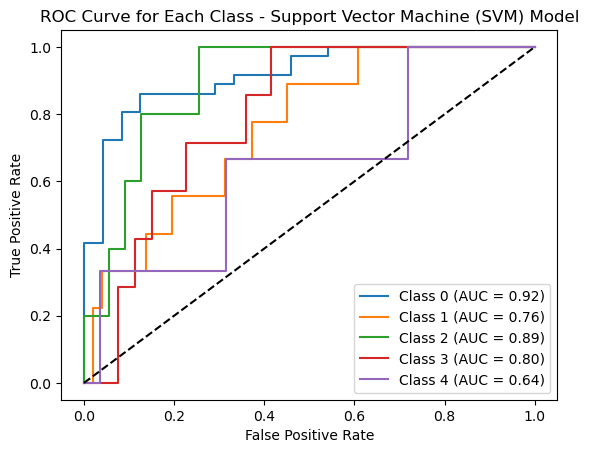

In [17]:
# 4 - Support Vector Machine (SVM) model
evaluate(svmmodel,"Support Vector Machine (SVM)")
ROC_AUC(svmmodel,"Support Vector Machine (SVM)")